<h1 align=center><font size = 5>Basic Data Exploring, Filtering and Visualizing Immigration Trends to Moldova</font></h1>

## Objectives
  * Explore and prepare the data
  * View the number of immigrants to Moldova in 2014-2021
  * Plot a line graph of immigration from country that contributed the most to immigration to Moldova
  * Plot the trend of the top 5 countries that contributed the most to immigration to Moldova

The Dataset: Immigration to Moldova from 2014 to 2021 (Imigranti dupa tara de emigrare si scopul sosirii, 2014-2021])

Dataset Source: [Populatia si procesele demografice: Imigranti dupa tara de emigrare si scopul sosirii, 2014-2021](https://statbank.statistica.md/PxWeb/pxweb/ro/20%20Populatia%20si%20procesele%20demografice/20%20Populatia%20si%20procesele%20demografice__POPrec__POP070/POP070100rcl.px/?rxid=b2ff27d7-0b96-43c9-934b-42e1a2a9a774).

The dataset contains annual data on the flows of international immigrants as recorded by the countries of destination for period of 2014-2021. 

## Downloading and Exploring Data

In [1]:
# import modules

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Read worksheet from excel file, skiping footer

df = pd.read_excel(
    '../2_Data_Cleaning/moldova_immigration_2014_2021.xlsx',
    sheet_name='Country immigration by years',
    skipfooter=1)

print('Data has been read.')

Data has been read.


In [3]:
# First 5 rows of dataframe

df.head()

,Country,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,1,1,0,2,0,5,0,0
1,South Africa,0,0,1,4,3,0,1,3
2,Albania,9,6,6,1,4,3,1,0
3,Algeria,1,2,1,3,1,2,1,4
4,Saudi Arabia,0,0,0,0,0,1,0,0


In [4]:
#  Last 5 rows of dataframe

df.tail()

,Country,2014,2015,2016,2017,2018,2019,2020,2021
121,Uzbekistan,22,37,24,27,41,204,58,117
122,Venezuela,0,0,1,0,0,1,0,1
123,Viet Nam,6,5,1,1,3,2,0,3
124,Yemen,1,1,0,1,1,0,0,0
125,Not defined,31,26,26,18,26,25,16,11


In [5]:
# Datatypes of each column

df.dtypes

Country    object
2014        int64
2015        int64
2016        int64
2017        int64
2018        int64
2019        int64
2020        int64
2021        int64
dtype: object

In [6]:
# The number of rows and columns in dataframe

df.shape

(126, 9)

In [7]:
# Set index to first column

df.set_index('Country', inplace=True)

In [8]:
# Create totals column

df['Total'] = df.sum(axis=1)

In [9]:
# Transfroming first row of years to string to avoid confusion  

df.columns = list(map(str, df.columns))

In [10]:
# Create years variable

years = list(map(str, range(2014, 2022)))
years

['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

In [11]:
# Print basic data about dataframe

print('data dimensions:', df.shape)
print(df.columns)
df.head()

data dimensions: (126, 9)
Index(['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       'Total'],
      dtype='object')


,2014,2015,2016,2017,2018,2019,2020,2021,Total
Country,,,,,,,,,
Afghanistan,1,1,0,2,0,5,0,0,9
South Africa,0,0,1,4,3,0,1,3,12
Albania,9,6,6,1,4,3,1,0,30
Algeria,1,2,1,3,1,2,1,4,15
Saudi Arabia,0,0,0,0,0,1,0,0,1


In [12]:
# Descriptive statistics

df.describe()

,2014,2015,2016,2017,2018,2019,2020,2021,Total
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,33.214286,33.404762,32.373016,29.420635,33.515873,38.515873,22.801587,32.746032,255.992063
std,116.532544,116.230817,114.903698,104.418799,114.533889,135.631662,85.094302,116.865046,867.093762
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.500000
50%,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,2.000000,3.000000,26.500000
75%,14.750000,14.000000,12.750000,12.000000,12.000000,10.000000,7.000000,9.000000,94.500000
max,852.000000,754.000000,734.000000,685.000000,752.000000,919.000000,642.000000,797.000000,5787.000000


In [13]:
# Check if there are null data

df.isnull().sum()

2014     0
2015     0
2016     0
2017     0
2018     0
2019     0
2020     0
2021     0
Total    0
dtype: int64

# Visualizing Data With Line Plots

In [14]:
# Set plot style 

# mpl.style.use(['ggplot']) 
mpl.style.use(['fivethirtyeight']) 

In [15]:
# Sort countries by total immigration to Moldova 2014-2021

df.sort_values(by='Total', ascending=False, axis=0, inplace=True)
df.head(5)

,2014,2015,2016,2017,2018,2019,2020,2021,Total
Country,,,,,,,,,
Ukraine,534,754,734,681,752,919,642,771,5787
Russia,516,567,705,685,683,739,426,538,4859
Romania,852,646,464,427,450,459,386,421,4105
Turkey,421,347,293,245,430,760,432,797,3725
Israel,525,548,594,456,489,83,42,102,2839


In [16]:
# Country with most total immigration to Moldova

df.index[0]

'Ukraine'

In [17]:
# Select 5 countries with most immigration to Moldova in last year (2021)

df_2021 = df.sort_values(by=['2021'], ascending=False, axis=0)

df_2021.index[:5].values.tolist()

['Turkey', 'Ukraine', 'Russia', 'Romania', 'India']

In [18]:
# Viewing the number of immigrants from Ukraine for 2014-2021

print(df.loc['Ukraine'])

2014      534
2015      754
2016      734
2017      681
2018      752
2019      919
2020      642
2021      771
Total    5787
Name: Ukraine, dtype: int64


In [19]:
# Create dataframe only for Ukraine data
# using years variable to exclude the 'Total' column

ukraine = df.loc['Ukraine', years] 
ukraine.head()

2014    534
2015    754
2016    734
2017    681
2018    752
Name: Ukraine, dtype: int64

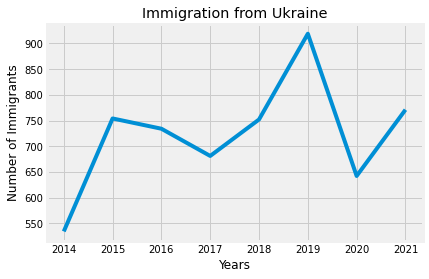

In [20]:
# Plotting a line graph of immigration from Ukraine

ukraine.plot(kind='line')

plt.title('Immigration from Ukraine')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show() 

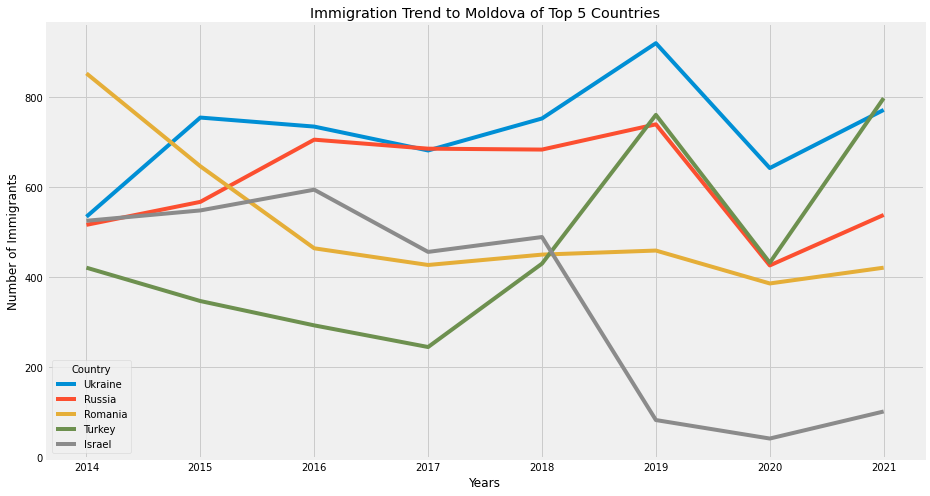

In [21]:
# Comparing the trend of top 5 countries that contributed the most to immigration to Moldova

# Create dataframe for top 5 entries
df_top5 = df.head(5)

# Transposing the dataframe
df_top5 = df_top5[years].transpose() 

# Changing index values of df_top5 to type integer for plotting
df_top5.index = df_top5.index.map(int) 

#Plotting the dataframe
df_top5.plot(kind='line', figsize=(14, 8))

plt.title('Immigration Trend to Moldova of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()